# Basic analytical simulation example

In [1]:
# tell Python where to find the simulation files
import sys

# change to what you need it to be
source_path = '/Users/settwi/Desktop/diagnostic-detector-sim'
sys.path.append(source_path)

from adetsim.sim_src.FlareSpectrum import FlareSpectrum
from adetsim.hafx_src.HafxStack import HafxStack

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
goes_class = 'M5'
start, end = 1, 300 # keV
delta_e = 0.1 # keV

fs = FlareSpectrum.make_with_battaglia_scaling(
    goes_class=goes_class, start_energy=start,
    end_energy=end, de=delta_e
)

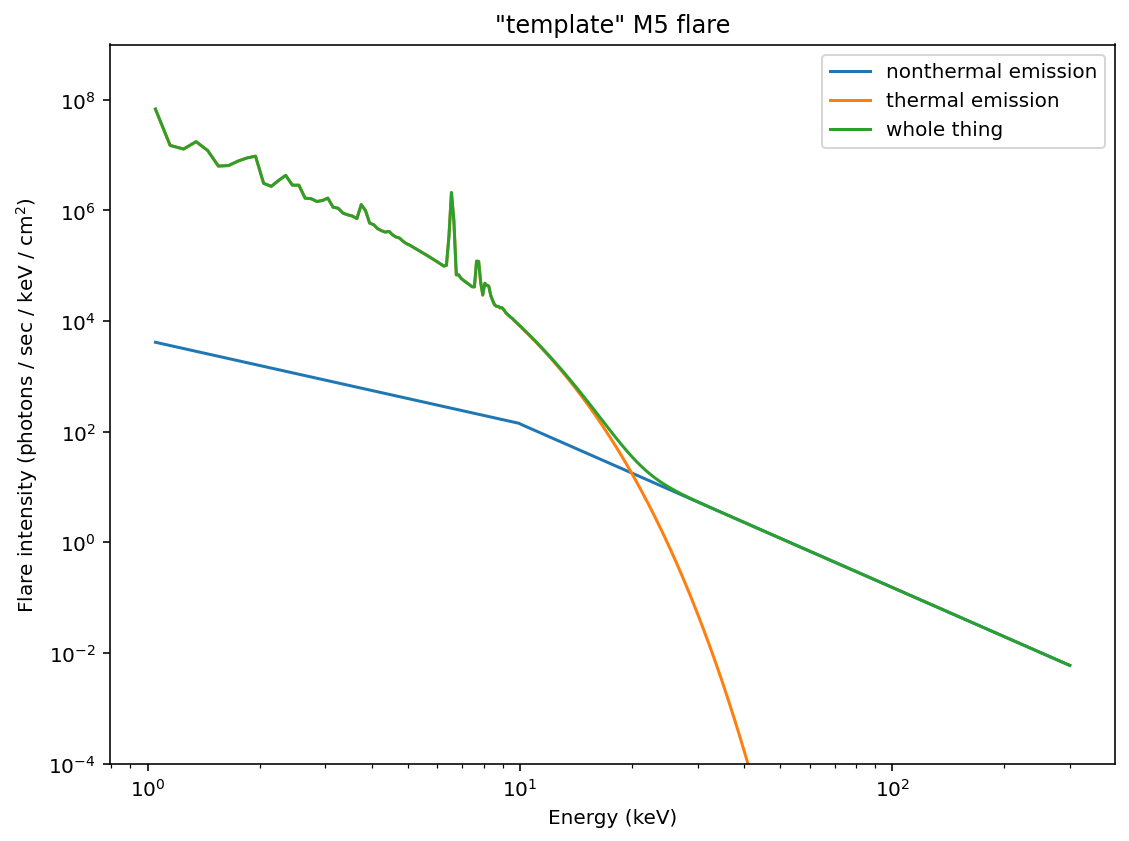

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(fs.energies, fs.nonthermal, label='nonthermal emission')
ax.plot(fs.energies, fs.thermal, label='thermal emission')
ax.plot(fs.energies, fs.flare, label='whole thing')

ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Flare intensity (photons / sec / keV / cm${}^2$)')
ax.set_title('"template" M5 flare')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(1e-4, 1e9)
ax.legend()

fig.tight_layout()
plt.show()

In [4]:
thin_stack = HafxStack(enable_scintillator=True, al_thick=5e-3)
thick_stack = HafxStack(enable_scintillator=True, al_thick=200e-6 * 100)

apply_energy_resolution = False
thin_response = thin_stack.generate_detector_response_to(fs, disperse_energy=apply_energy_resolution)
thick_response = thick_stack.generate_detector_response_to(fs, disperse_energy=apply_energy_resolution)

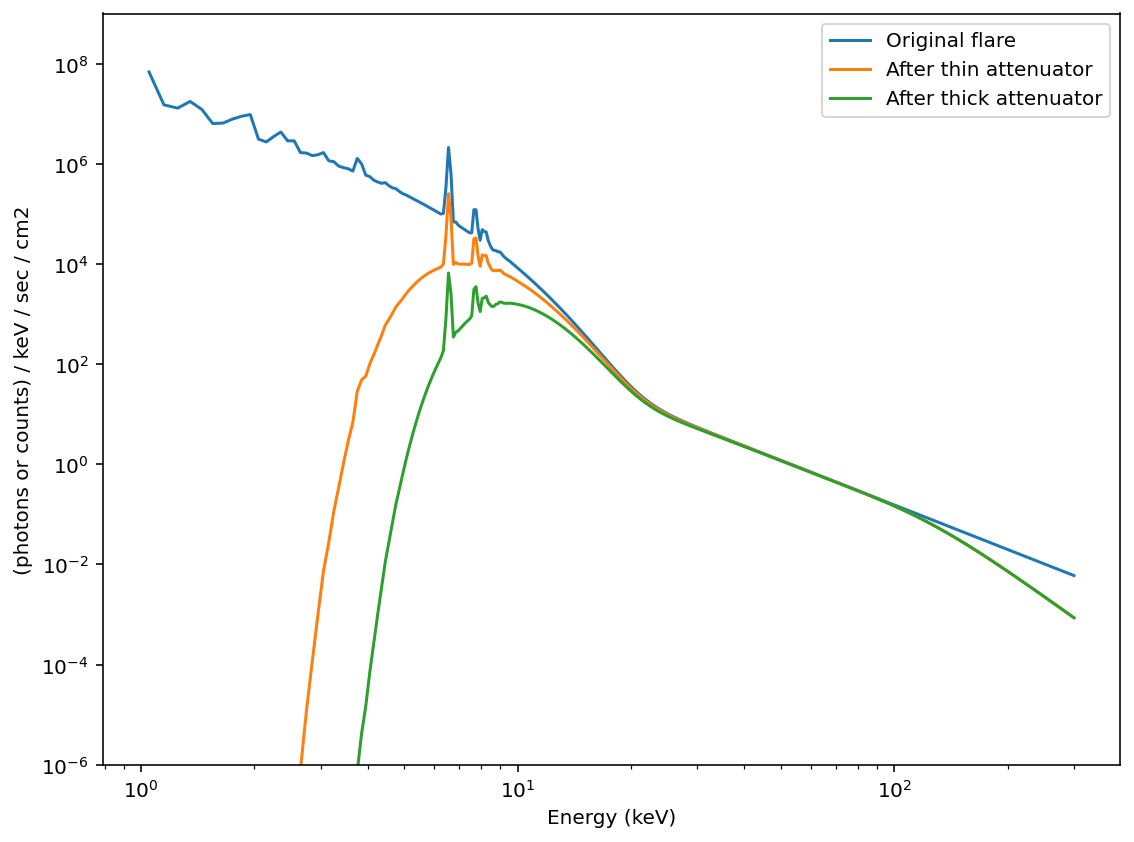

In [5]:
flare_after_thin = thin_response @ fs.flare
flare_after_thick = thick_response @ fs.flare

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(fs.energies, fs.flare, label='Original flare')
ax.plot(fs.energies, flare_after_thin, label='After thin attenuator')
ax.plot(fs.energies, flare_after_thick, label='After thick attenuator')

ax.set_xlabel('Energy (keV)')
ax.set_ylabel('(photons or counts) / keV / sec / cm2')

ax.set_ylim(1e-6, 1e9)
ax.legend()
fig.tight_layout()
plt.show()